# Exercise 4

## 3. Stroboscope on Pendulum

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.integrate import solve_ivp

%matplotlib inline

In [2]:
def forced_pendulum(t, u, g, m, w):
    u_1 = u[0]
    u_2 = u[1]
    u_3 = u[2]
    
    f_1 = u_2
    f_2 = -2. * g * u_2 - np.sin(u_1) + m * np.sin(w * u_3 *np.pi * 2)
    f_3 = 1.
    
    return [f_1, f_2, f_3]

The tricky thing is to find the right slicing of the simulation output, such that we flash the data at a stroboscope frequency equal to the excitation frequency, taking into account the time stepsize.

In [56]:

def sim_pendulum_strobo(params, u0=[0,0,0], t_start=0., t_stop=100000., t_steps=1000001):
    m, g, w = params
    
    t_range = np.linspace(t_start, t_stop, int(t_steps))

    solution = solve_ivp(lambda t, u: forced_pendulum(t, u, g, m, w), t_span=(t_start, t_stop), y0=u0, t_eval=t_range)
    solution.y[0] = [a % (2*np.pi) - np.pi for a in solution.y[0] + np.pi]

    u1=solution.y[0][1000:-1:int(1/w*(t_steps-1)/(t_stop-t_start))]
    u2=solution.y[1][1000:-1:int(1/w*(t_steps-1)/(t_stop-t_start))]
    plt.scatter(u1, u2, s=0.5)
    plt.xlabel('displacement')
    plt.ylabel('velocity')
    print(len(u1))
    print(1/w*(t_steps-1)/(t_stop-t_start))
    #print(solution.y[1])

9990
100.0


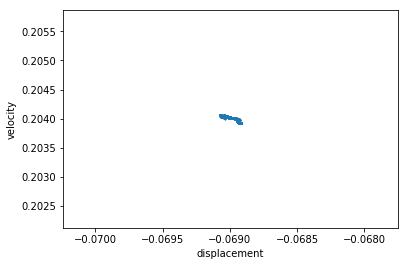

In [51]:
sim_pendulum_strobo((0.2, .1, 0.1))

At low forcing amplitude, we see periodicity within the numerical precision of the simulation.

9990
100.0


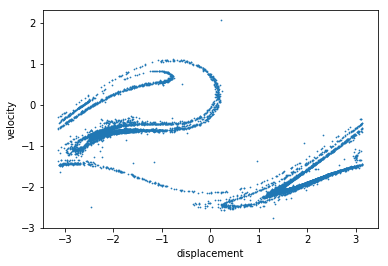

In [50]:
sim_pendulum_strobo((.8, .1, 0.1))

9990
100.0


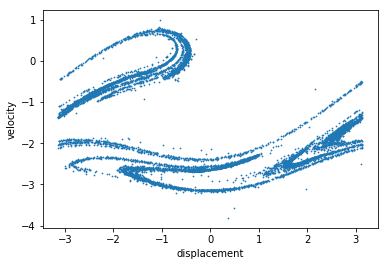

In [44]:
sim_pendulum_strobo((1.25, .1, 0.1), t_stop=100000)

Let's zoom into the picture:

99900
10.0


(-3, -1)

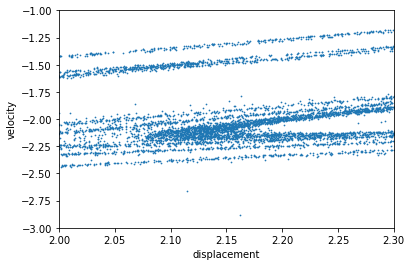

In [47]:
sim_pendulum_strobo((1.15, .1, 0.1), t_stop=1000000., t_steps=1000001)
plt.xlim(2.0, 2.3)
plt.ylim(-3,-1)

99900
10.0


(-1, 1)

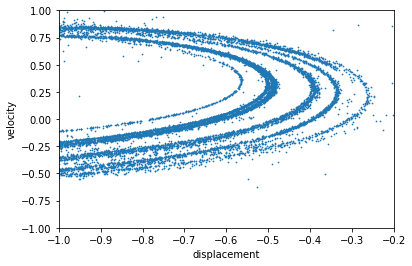

In [48]:
sim_pendulum_strobo((1.15, .1, 0.1), t_stop=1000000., t_steps=1000001)
plt.xlim(-1.0, -0.2)
plt.ylim(-1,1)

Let's try a forcing of the second kind:

In [61]:
def forced_pendulum2(t, u, g, m, w):
    u_1 = u[0]
    u_2 = u[1]
    u_3 = u[2]
    
    f_1 = u_2
    f_2 = -2. * g * u_2 - np.sin(u_1) + m*np.sin(3/5 * w *np.pi * 2 * u_3) * np.sin(w * u_3 *np.pi * 2)
    f_3 = 1.
    
    return [f_1, f_2, f_3]


def sim_pendulum_strobo2(params, u0=[0,0,0], t_start=0., t_stop=100000., t_steps=1000001):
    m, g, w = params
    
    t_range = np.linspace(t_start, t_stop, int(t_steps))

    solution = solve_ivp(lambda t, u: forced_pendulum2(t, u, g, m, w), t_span=(t_start, t_stop), y0=u0, t_eval=t_range)
    solution.y[0] = [a % (2*np.pi) - np.pi for a in solution.y[0] + np.pi]

    u1=solution.y[0][10000:-1:int(1/w*(t_steps-1)/(t_stop-t_start))]
    u2=solution.y[1][10000:-1:int(1/w*(t_steps-1)/(t_stop-t_start))]
    plt.scatter(u1, u2, s=0.5)
    plt.xlabel('displacement')
    plt.ylabel('velocity')
    print(len(u1))
    print(1/w*(t_steps-1)/(t_stop-t_start))
    #print(solution.y[1])

9900
100.0


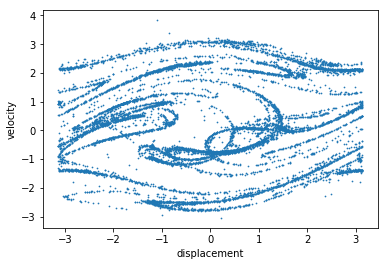

In [62]:
sim_pendulum_strobo2((1.25, .1, 0.1), t_stop=100000)